In [2]:
import pandas as pd
import numpy as np
import tempfile
import tensorflow as tf
import pandas as pd

In [3]:
sample_train_pickle = pd.read_pickle('../generalization_data/sample_train_processed_processed_54339.pkl')

In [4]:
sample_train_pickle = sample_train_pickle.reset_index(drop=True)
sample_train_pickle

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
0,2c9207157bf91042017c0d2beef00470,2c9207157bcbb76b017bcde2b46d04cd,1,36.0,5,5,1,"[0.2459783180342179, 0.21938831787537966, -0.0...",3,0,...,350.0,360.0,"[0.007319529543557632, 0.0003354154328290771, ...",1,"[0.033013137623400135, -0.035688917703485826, ...",1,"[0.139618999709323, -0.030086416810889256, -0....",13.0,1209.5,0
1,2c9207157d308592017d4a94cb1113a1,2c9207157d2f0ec5017d5a9265ba33d9,1,27.0,6,5,1,"[0.26393201542159855, 0.10435436209119428, -0....",3,1,...,350.0,360.0,"[0.0995745047074556, -0.02088326554704094, -0....",1,"[0.37018351050902737, -0.20255122674942938, -0...",1,"[0.5419245911087135, -0.18238753835825924, -0....",3.0,76.5,1
2,2c9207157dabb0a3017dbca16cdf4c26,2c9207157d631abb017d6eed1c79139f,0,28.0,6,5,1,"[0.27642059835889154, -0.02735173829637042, 0....",1,1,...,300.0,450.0,"[0.043222795997538296, 0.01108309987508924, 0....",1,"[0.28941341021190825, -0.0474103810249287, -0....",1,"[0.09166404085822458, 0.013460082203324779, -0...",5.0,1034.0,1
3,2c9207157dbedf8d017dc1503c891402,2c9207157dc878e5017de5ee152b646c,1,38.0,6,5,1,"[0.20328670858820733, -0.005197850015064169, -...",2,0,...,450.0,360.0,"[0.15026256194834306, -0.004905085247130754, -...",1,"[0.18618173823787507, 0.031168513777247584, 0....",1,"[0.08785093521473429, 0.04596513112440933, -0....",11.0,776.5,0
4,2c9207157dbedf8d017dc1503c891402,2c9207157dbedfdb017dc14a85ff432f,0,38.0,6,5,1,"[0.20498743446953704, -0.006300276619096516, -...",2,0,...,800.0,360.0,"[0.15026256194834306, -0.004905085247130754, -...",2,"[0.19163011557219942, 0.025951225287628978, 0....",1,"[0.10718268355356483, 0.05565724707601688, -0....",11.0,776.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54334,8a69d7a68219933d018248864f066edd,8a69f601823a92b00182494187c01920,1,29.0,5,5,1,"[0.2625502866681783, -0.08516054875935031, 0.0...",5,0,...,375.0,360.0,"[0.23530919072669182, 0.7944767263661332, 0.01...",1,"[0.30282726216339745, 0.16097547637426476, 0.0...",1,"[0.08847069778780742, 0.22734187469570663, -0....",9.0,1075.0,0
54335,8a69d7a68219933d01824944cb1533be,8a69c4a8820f0ee00182143637b71ef3,0,38.0,5,5,1,"[0.13488778904906526, -0.043533761211661984, 0...",7,0,...,425.0,1020.0,"[0.6087412984522569, -0.1473860953415076, -0.0...",1,"[0.15424621070300917, -0.0012759763333448448, ...",1,"[0.19044431984360052, -0.019572235686217573, 0...",16.0,796.5,1
54336,8a69d7c2821994530182251640042c20,8a69f68e82198e9101822012a308030b,1,27.0,5,3,1,"[0.192223443587156, 0.25067413083354817, 0.053...",1,1,...,84.0,600.0,"[0.024225991980613454, -0.0015968824512811737,...",1,"[0.23573037593299082, -0.13812537376984757, 0....",1,"[0.1171332341680559, -0.006169459729397869, -0...",4.0,1019.0,0
54337,8a69d7c28219945301823a2058767134,8a69f68e82198e9101823506dafb2080,1,29.0,6,5,1,"[0.2550351130980516, -0.09468529288217858, -0....",4,0,...,260.0,280.0,"[0.8678408186646723, -0.22318129673531545, -0....",1,"[0.19019357171237353, -0.12296867979940661, -0...",1,"[0.3466942038817421, -0.07639258814853622, 0.3...",3.0,776.5,0


In [5]:
sample_test_pickle = pd.read_pickle('../generalization_data/sample_test_processed_processed_13586.pkl')

In [6]:
sample_test_pickle = sample_test_pickle.reset_index(drop=True)
sample_test_pickle

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
0,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,0,29.0,5,3,1,"[0.17896497513724188, 0.07571414550659793, -0....",4,0,...,350.0,360.0,"[0.171817730230271, -0.035070685612599815, -0....",1,"[0.04458234091145562, -0.03407758459309192, 0....",1,"[0.3252484303865592, -0.1404601755384386, -0.1...",7.0,506.000000,0
1,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,1,32.0,6,5,1,"[0.0022543548572903855, 0.0013497502728216206,...",0,1,...,350.0,360.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[7.362506665850695e-05, -1.7992806189079e-05, ...",1,"[0.3068414446421549, -0.0731466854560243, 0.34...",14.0,811.500000,1
2,2c9207157dbedf8d017dc7561a247ced,2c9207157dbedfdb017dc10786e9259d,1,27.0,3,3,1,"[0.19160914563647896, 0.043307168218026076, -0...",2,0,...,350.0,360.0,"[0.0006823661944716316, -0.0001667280999103190...",1,"[0.12353797170875343, -0.10053731489253163, 0....",1,"[0.16655266271797456, -0.05843355822813081, -0...",6.0,395.500000,0
3,2c9207157e58b769017e61a3e13c0944,2c9207157e425d5c017e48061bb50e14,0,38.0,6,5,1,"[0.3352685938668621, -0.06193383868396666, 0.2...",1,0,...,375.0,500.0,"[0.06824288797273276, 0.3345999082804966, -0.0...",1,"[0.31934960678804675, 0.33476821858920475, 0.0...",0,"[0.21647338719008005, 0.6192388484570416, -0.0...",8.0,1583.000000,1
4,2c9207157e58b769017e9a416cff07d9,2c9207157e425d5c017e47121b3a6eef,0,26.0,5,5,1,"[0.193992358450605, -0.12803979466841925, -0.0...",5,0,...,375.0,400.0,"[0.005677395289748753, 0.003916162454285459, 0...",1,"[0.21814583275640784, -0.01721680318513782, -0...",0,"[0.08803453540478255, 0.03652972730097373, 0.0...",8.0,639.250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,8a69c4b5820f0b2101820f99257c07b7,2c9207158114fb2901811ee8a68f49ea,0,37.0,6,5,1,"[0.18894454111724257, 0.30492528922333145, 0.1...",5,0,...,2040.0,1200.0,"[0.04997392570055781, -0.004502174307944112, 0...",1,"[0.20130461498046187, -0.12255278588074696, 0....",1,"[0.09944266033041682, 0.015459251512970253, -0...",15.0,534.333333,1
13582,8a69d7a68219933d01823fff37d04ba3,8a69f6f8823a93b901823ffcfae57267,1,40.0,6,6,1,"[0.08540682135035549, 0.0464066016768764, 0.03...",2,2,...,960.0,360.0,"[0.03691517113152803, -0.0035258117015806523, ...",1,"[0.23004562348177082, -0.09744323796595142, 0....",1,"[0.08820578402787298, -0.01840399298441212, -0...",14.0,776.500000,1
13583,8a69d7c282199453018233eef4a43340,2c92071581ebf3390181f5b6628042bd,1,29.0,5,3,1,"[0.1557873230952529, 0.07473260131093742, -0.0...",4,0,...,240.0,360.0,"[0.07266604344946537, -0.009615434260558572, 0...",1,"[0.23905501196703516, -0.07952094007708325, 0....",1,"[0.12134680786849046, 0.0131295908164011, 0.03...",7.0,1353.500000,0
13584,8a69d7c2821994530182395f8b7032c7,8a69f68e82198e91018234ee6739094a,0,30.0,5,5,1,"[0.1987571952893996, 0.07294446763122266, -0.1...",3,1,...,195.0,360.0,"[0.271392628512948, -0.05242300248651601, 0.50...",1,"[0.06003737476583179, -0.05225116621866782, -0...",1,"[0.30693235404040736, -0.13829145445971983, -0...",6.0,502.000000,0


In [7]:
sample_gen_pickle = pd.read_pickle('../generalization_data/sample_gen_processed_processed_6108.pkl')

In [8]:
sample_gen_pickle = sample_gen_pickle.reset_index(drop=True)
sample_gen_pickle

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
0,2c9207157f8e60cd017f960e491b6f43,8a69c468826ee9b401828badfc6c3158,0,41.0,6,5,1,"[0.11442535037227546, 0.0534682035829645, -0.1...",3,0,...,720.0,360.0,"[0.01410938306399229, -0.0013842289481747908, ...",1,"[0.16147995305672858, -0.07191881877515002, -0...",1,"[0.4002958143776276, -0.18420725834968477, -0....",19.0,1122.000000,0
1,2c9207158059e82b018093a6e4cb418b,2c92071580dd3ab70180f18714e119c0,0,33.0,3,5,0,"[0.4501867000452721, -0.2863792718427415, 0.24...",5,0,...,210.0,360.0,"[0.1833094661547266, 0.5715641770033284, -0.00...",30,"[0.42336579128110136, 0.4415293631473783, 0.08...",1,"[0.2136262495353285, 0.6889780980076565, -0.03...",8.0,718.800000,0
2,8a69c40a8256f56001825ca41faf64ef,8a69f68e82198e9101821a368c682309,1,33.0,5,5,1,"[0.11775671151124475, -0.011553286324814227, 0...",2,0,...,480.0,360.0,"[0.1242462692048715, 0.059776515919823886, 0.0...",1,"[0.13464711322627812, 0.03601774564762096, 0.0...",1,"[0.0846159262961945, 0.14089215219884776, -0.0...",9.0,704.714286,1
3,8a69c40a8256f56001826286256928f3,8a69c47b82590db9018266992c3969ee,0,22.0,3,3,1,"[0.16766031367661063, 0.08010325682707635, -0....",4,1,...,180.0,108.0,"[0.040317751879249734, -0.004257781078691267, ...",10,"[0.2017619187252856, -0.1156944482993234, 0.12...",1,"[0.10444744556880664, -0.03406922047311521, -0...",1.0,46.000000,1
4,8a69c40a8256f56001826286256928f3,8a69c4a8820f0ee001821446eaaf33e6,1,22.0,3,3,1,"[0.1651847923619087, 0.08347563503643975, -0.0...",3,1,...,120.0,108.0,"[0.040317751879249734, -0.004257781078691267, ...",40,"[0.19550223541803413, -0.1128925577464503, 0.1...",1,"[0.11715741531242865, -0.03963572163058257, -0...",1.0,46.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,1,31.0,3,3,1,"[0.2567986184645047, 0.1773098969033448, -0.05...",4,0,...,360.0,360.0,"[0.09276561511018605, -0.009011915759238062, 0...",1,"[0.3645132923299154, -0.22668855509127542, 0.0...",1,"[0.2028996048643067, -0.07039791359665602, -0....",11.0,1268.000000,1
6104,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,1,36.0,3,3,1,"[0.25056830107660755, 0.1855862403422956, -0.0...",3,0,...,180.0,120.0,"[0.22000723570438951, -0.03295513889781696, 0....",5,"[0.1900283816382599, -0.101841367221085, 0.037...",1,"[0.2731820444500037, -0.09003645686019562, -0....",14.0,1583.333333,0
6105,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,0,27.0,5,5,1,"[0.4501867000452721, -0.2863792718427415, 0.24...",5,0,...,210.0,300.0,"[0.153610738681069, 0.7683157290699305, -0.012...",30,"[0.42336579128110136, 0.4415293631473783, 0.08...",1,"[0.2136262495353285, 0.6889780980076565, -0.03...",5.0,487.000000,1
6106,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,1,43.0,6,5,1,"[0.0023119905200976844, 0.0012746774424303585,...",1,1,...,390.0,900.0,"[0.06146393099923767, -0.005610505861232773, 0...",1,"[0.002297610145839555, -0.0017582815189133496,...",1,"[0.05431574129285235, -0.0031620523933319758, ...",16.0,968.666667,0


In [9]:
sample_train_pickle.shape

(54339, 25)

In [10]:
sample_test_pickle.shape

(13586, 25)

In [11]:
sample_gen_pickle.shape

(6108, 25)

In [12]:
sample_train_pickle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54339 entries, 0 to 54338
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cv_id                          54339 non-null  object 
 1   jd_id                          54339 non-null  object 
 2   model_label                    54339 non-null  int64  
 3   age                            54339 non-null  float64
 4   degree_index_cv                54339 non-null  int64  
 5   degree_index_jd                54339 non-null  int64  
 6   degree_match_cvjd              54339 non-null  int64  
 7   description_tfidf_pca          54339 non-null  object 
 8   equal_job                      54339 non-null  int64  
 9   gender_index_cv                54339 non-null  int64  
 10  job_intentstatus_cv            54339 non-null  int64  
 11  keyU                           54339 non-null  int64  
 12  kills_tfidf_pca                54339 non-null 

In [13]:
flags = tf.app.flags
FLAGS = flags.FLAGS
tf.app.flags.DEFINE_string('f','','kernel')

flags.DEFINE_string("model_dir", "../modelV0915", "Base directory for output models.") #模型输出路径
flags.DEFINE_integer("train_steps", 100, "Number of training steps.") 


In [14]:
COLUMNS = ['age', 'recruit_number', 'workYear', 'min_annual_salary', 'max_annual_salary', 
            'degree_index_cv', 'degree_index_jd', 'gender_index_cv', 'job_intentstatus_cv',
            'description_tfidf_pca', 'position_tfidf_pca', 'requirement_tfidf_pca', 'kills_tfidf_pca', 'title_category_tags_tfidf_pca',
            'work_duration_mean', 'equal_job', 'parsed_desiredSalary', 'school_intersect_cvjd', 'location_intersect_cvjd',
            'degree_match_cvjd', 'workyear_match_cvjd', 'keyU']

LABEL_COLUMN = "model_label"

# 离散特征
CATEGORICAL_COLUMNS = ['degree_index_cv', 'degree_index_jd', 'gender_index_cv', 'job_intentstatus_cv', 'school_intersect_cvjd',
                        'location_intersect_cvjd', 'degree_match_cvjd', 'workyear_match_cvjd', 'keyU']

# 文本向量特征
ARRAY_COLUMNS = ['description_tfidf_pca', 'position_tfidf_pca', 'requirement_tfidf_pca', 'kills_tfidf_pca', 'title_category_tags_tfidf_pca']

# 连续特征
CONTINUOUS_COLUMNS = ['age', 'recruit_number', 'workYear', 'min_annual_salary', 'max_annual_salary', 
                    'work_duration_mean', 'equal_job', 'parsed_desiredSalary', ]


In [15]:
model_dir = tempfile.mkdtemp() if not '../modelV0915' else '../modelV0915'
print("model dir = %s" % model_dir)

model dir = ../modelV0915


In [16]:
def col2arr(data,col):
    slist = []
    for i in tuple(data.index):
        slist.append(np.array(data.loc[i,col]))
    return np.array(slist)

def input_fn(df):
    continuous_cols = {k: tf.constant(df[k].values) for k in CONTINUOUS_COLUMNS}
    array_cols = {k: tf.constant(col2arr(df,k)) for k in ARRAY_COLUMNS}
    categorical_cols = {k: tf.SparseTensor(indices=[[i,0] for i in range( df[k].size)], values = df[k].values, dense_shape=[df[k].size,1]) for k in CATEGORICAL_COLUMNS}
    
    feature_cols = dict(continuous_cols)
    feature_cols.update(categorical_cols)
    feature_cols.update(array_cols)
    
    label = tf.constant(df[LABEL_COLUMN].values)

    return feature_cols, label

In [17]:
CATEGORICAL_COLUMNS = ['degree_index_cv', 'degree_index_jd', 'gender_index_cv', 'job_intentstatus_cv', 'school_intersect_cvjd',
                        'location_intersect_cvjd', 'degree_match_cvjd', 'workyear_match_cvjd', 'keyU']

# 文本向量特征
ARRAY_COLUMNS = ['description_tfidf_pca', 'position_tfidf_pca', 'requirement_tfidf_pca', 'kills_tfidf_pca', 'title_category_tags_tfidf_pca']

# 连续特征
CONTINUOUS_COLUMNS = ['age', 'recruit_number', 'workYear', 'min_annual_salary', 'max_annual_salary', 
                    'work_duration_mean', 'equal_job', 'parsed_desiredSalary', ]

In [ ]:
'''
tf.feature_column.categorical_column_with_identity(
    key, num_buckets, default_value=None
)
Use this when your inputs are integers in the range [0, num_buckets), 
and you want to use the input value itself as the categorical ID. 
Values outside this range will result in default_value if specified, otherwise it will fail.
'''

In [18]:
# cv的特征一开始是3-10，后来减去了3，变成0-7
# jd的学历特征也减去了3
sample_train_pickle['workyear_match_cvjd'].value_counts()

0    30281
1    24058
Name: workyear_match_cvjd, dtype: int64

In [19]:
sample_train_pickle['title_category_tags_tfidf_pca'][0].__len__()

30

In [20]:
# 将类别特征变成onehot，default_value需要注意
degree_index_cv = tf.feature_column.categorical_column_with_identity('degree_index_cv', num_buckets=8, default_value=0)
degree_index_jd = tf.feature_column.categorical_column_with_identity('degree_index_jd', num_buckets=8, default_value=0)
gender_index_cv = tf.feature_column.categorical_column_with_identity('gender_index_cv', num_buckets=3, default_value=0)
job_intentstatus_cv = tf.feature_column.categorical_column_with_identity('job_intentstatus_cv', num_buckets=4, default_value=0)
school_intersect_cvjd = tf.feature_column.categorical_column_with_identity('school_intersect_cvjd', num_buckets=2, default_value=0)
location_intersect_cvjd = tf.feature_column.categorical_column_with_identity('location_intersect_cvjd', num_buckets=2, default_value=0)
degree_match_cvjd = tf.feature_column.categorical_column_with_identity('degree_match_cvjd', num_buckets=2, default_value=0)
workyear_match_cvjd = tf.feature_column.categorical_column_with_identity('workyear_match_cvjd', num_buckets=2, default_value=0)
keyU = tf.feature_column.categorical_column_with_identity('keyU', num_buckets=2, default_value=0)

# 多维数值特征输入
description_tfidf_pca = tf.feature_column.numeric_column(key="description_tfidf_pca",shape=70)
position_tfidf_pca = tf.feature_column.numeric_column(key="position_tfidf_pca",shape=40)
requirement_tfidf_pca = tf.feature_column.numeric_column(key="requirement_tfidf_pca",shape=70)
kills_tfidf_pca = tf.feature_column.numeric_column(key="kills_tfidf_pca",shape=30)
title_category_tags_tfidf_pca = tf.feature_column.numeric_column(key="title_category_tags_tfidf_pca",shape=30)

# 一维数值特征，还没归一化
age = tf.feature_column.numeric_column("age", default_value=0.0)
recruit_number = tf.feature_column.numeric_column("recruit_number", default_value=0.0)
workYear = tf.feature_column.numeric_column("workYear", default_value=0.0)
min_annual_salary = tf.feature_column.numeric_column("min_annual_salary", default_value=0.0)
max_annual_salary = tf.feature_column.numeric_column("max_annual_salary", default_value=0.0)
work_duration_mean = tf.feature_column.numeric_column("work_duration_mean", default_value=0.0)
equal_job = tf.feature_column.numeric_column("equal_job", default_value=0.0)
parsed_desiredSalary = tf.feature_column.numeric_column("parsed_desiredSalary", default_value=0.0)

# 连续特征分桶onehot
# 连续特征离散化后只会出现在wide侧。
# 思考下：1.哪些特征可以放入wide侧 2.桶的范围
age_buckets = tf.feature_column.bucketized_column(age, boundaries= [18, 25, 30, 35, 40, 45])
recruit_number_buckets = tf.feature_column.bucketized_column(recruit_number, boundaries= [5, 10, 15])
workYear_buckets = tf.feature_column.bucketized_column(workYear, boundaries= [3, 5, 10, 15, 20])
work_duration_mean_buckets = tf.feature_column.bucketized_column(work_duration_mean, boundaries= [365, 547, 730, 1095, 1460])
equal_job_buckets = tf.feature_column.bucketized_column(equal_job, boundaries= [3, 5, 7, 10])
# 还有3个salary特征没有处理


In [21]:
# 类别特征onehot
# 连续数值特征分桶离散化
# 交叉特征
wide_columns = [
                degree_index_cv, degree_index_jd, gender_index_cv, job_intentstatus_cv, 
                school_intersect_cvjd, location_intersect_cvjd, degree_match_cvjd, workyear_match_cvjd, keyU,
                age_buckets, recruit_number_buckets, workYear_buckets, work_duration_mean_buckets, equal_job_buckets,
                tf.feature_column.crossed_column([degree_index_cv, degree_index_jd], hash_bucket_size=int(1e2)),
                tf.feature_column.crossed_column([degree_index_cv, workYear_buckets], hash_bucket_size=int(1e2)),
                tf.feature_column.crossed_column([degree_index_cv, gender_index_cv, age_buckets], hash_bucket_size=int(1e2)),
                tf.feature_column.crossed_column([school_intersect_cvjd, degree_match_cvjd, workyear_match_cvjd, keyU], hash_bucket_size=int(1e2)),
                ]

# 文本向量特征
# 类别特征onehot之后接入embedding层
# 连续的数值特征没有接入
deep_columns = [
                description_tfidf_pca, position_tfidf_pca, requirement_tfidf_pca, kills_tfidf_pca, title_category_tags_tfidf_pca,
                tf.feature_column.embedding_column(degree_index_cv, 8),
                tf.feature_column.embedding_column(degree_index_jd, 8),
                tf.feature_column.embedding_column(gender_index_cv, 8),
                tf.feature_column.embedding_column(school_intersect_cvjd, 8),
                tf.feature_column.embedding_column(location_intersect_cvjd, 8),
                tf.feature_column.embedding_column(degree_match_cvjd, 8),
                tf.feature_column.embedding_column(workyear_match_cvjd, 8),
                tf.feature_column.embedding_column(keyU, 8),
                ]

In [22]:
# 黄金数据集的分位点
percent_list = list(range(1, 10)) 
percent_list.extend([9.5, 9.6, 9.7, 9.8, 9.9, 10])
percent_list = map(lambda x: x*10, percent_list)

# 计算分位点
for percent in percent_list:
    num = np.percentile(sample_train_pickle['work_duration_mean'], percent, interpolation='midpoint')
    print("%{}的分位点是：{}".format(percent, num))

%10的分位点是：420.29999999999995
%20的分位点是：540.75
%30的分位点是：629.3333333333334
%40的分位点是：715.0
%50的分位点是：776.5
%60的分位点是：842.3333333333334
%70的分位点是：958.2916666666667
%80的分位点是：1103.5
%90的分位点是：1383.517857142857
%95.0的分位点是：1673.6666666666667
%96.0的分位点是：1765.0
%97.0的分位点是：1872.0
%98.0的分位点是：2070.0
%99.0的分位点是：2460.0
%100的分位点是：3624.0


In [23]:
est_config = tf.estimator.RunConfig(
    save_checkpoints_steps = 50,    # Save checkpoints every this many steps. 
    keep_checkpoint_max = 0,       # If None or 0, all checkpoint files are kept. 
)


m = tf.estimator.DNNLinearCombinedClassifier(model_dir=model_dir, 
                                            linear_feature_columns=wide_columns, 
                                            dnn_feature_columns = deep_columns, 
                                            dnn_hidden_units=[200, 100, 30, 10],
                                            config=est_config)

INFO:tensorflow:Using config: {'_model_dir': '../modelV0915', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 50, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb318c962b0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
m.train(input_fn=lambda: input_fn(sample_train_pickle), steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into ../modelV0915/model.ckpt.


In [23]:
results = m.evaluate(input_fn=lambda: input_fn(sample_test_pickle), steps=1, checkpoint_path = '../modelV0915/model.ckpt-100')

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-15T11:29:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-15-11:29:29
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.6824672, accuracy_baseline = 0.58788455, auc = 0.74035996, auc_precision_recall = 0.6682919, average_loss = 0.5893041, global_step = 100, label/mean = 0.41211542, loss = 8006.285, precision = 0.6729475, prediction/mean = 0.4019297, recall = 0.44650832
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: ../modelV0915/model.ckpt-100


In [24]:
##################################################################################################
# 对泛化数据进行预测
results = m.evaluate(input_fn=lambda: input_fn(sample_gen_pickle), steps=1, checkpoint_path = '../modelV0915/model.ckpt-100')
##################################################################################################

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-15T13:13:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-15-13:13:57
INFO:tensorflow:Saving dict for global step 100: accuracy = 0.64014405, accuracy_bas

In [25]:
##################################################################################################
# 对泛化数据进行预测
results = m.evaluate(input_fn=lambda: input_fn(sample_gen_pickle), steps=1, checkpoint_path = '../modelV0915/model.ckpt-500')
##################################################################################################

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-15T13:14:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-15-13:14:43
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.6617551, accuracy_baseline = 0.5577931, auc = 0.7132644, auc_precision_recall = 0.737845, average_loss = 0.6165176, global_step = 500, label/mean = 0.5577931, loss = 3765.6897, precision = 0.6802904, prediction/mean = 0.5551147, recall = 0.74258876
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: ../modelV0915/model.ckpt-500


In [26]:
##################################################################################################
# 对泛化数据进行预测
results = m.evaluate(input_fn=lambda: input_fn(sample_gen_pickle), steps=1, checkpoint_path = '../modelV0915/model.ckpt-1000')
##################################################################################################

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-15T13:15:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-15-13:15:06
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.66977733, accuracy_baseline = 0.5577931, auc = 0.71662736, auc_precision_recall = 0.7450944, average_loss = 0.62239766, global_step = 1000, label/mean = 0.5577931, loss = 3801.605, precision = 0.68184197, prediction/mean = 0.5742811, recall = 0.7648958
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ../modelV0915/model.ckpt-1000


In [24]:
results = m.evaluate(input_fn=lambda: input_fn(sample_test_pickle), steps=1, checkpoint_path = '../modelV0915/model.ckpt-500')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-15T11:29:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-15-11:29:50
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.7169881, accuracy_baseline = 0.58788455, auc = 0.78576434, auc_precision_recall = 0.7221623, average_loss = 0.545416, global_step = 500, label/mean = 0.41211542, loss = 7410.022, precision = 0.6973447, prediction/mean = 0.39967796, recall = 0.5534917
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: ../modelV0915/model.ckpt-500


In [37]:
results = m.evaluate(input_fn=lambda: input_fn(sample_test_pickle), steps=1, checkpoint_path = '../modelV0915/model.ckpt-1000')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-09-15T11:34:10Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2022-09-15-11:34:13
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7365671, accuracy_baseline = 0.58788455, auc = 0.80660886, auc_precision_recall = 0.747384, average_loss = 0.52290165, global_step = 1000, label/mean = 0.41211542, loss = 7104.142, precision = 0.7113855, prediction/mean = 0.40097103, recall = 0.6070727
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: ../modelV0915/model.ckpt-1000


In [29]:
results

{'accuracy': 0.7365671,
 'accuracy_baseline': 0.58788455,
 'auc': 0.80660886,
 'auc_precision_recall': 0.747384,
 'average_loss': 0.52290165,
 'label/mean': 0.41211542,
 'loss': 7104.142,
 'precision': 0.7113855,
 'prediction/mean': 0.40097103,
 'recall': 0.6070727,
 'global_step': 1000}

In [78]:
p = m.predict(input_fn=lambda: input_fn(sample_test_pickle), checkpoint_path = '../modelV0915/model.ckpt-1000')

In [60]:
##################################################################################################
#sample_gen_pickle
cvjd_202208_6108 = pd.read_pickle('../generalization_data/cvjd_202208_6108.pkl')

cvjd_202208_6108_filter = cvjd_202208_6108[~((cvjd_202208_6108['da_label']==-1)&(cvjd_202208_6108['rank_label']==1))]

sample_gen_pickle_filter = cvjd_202208_6108_filter[['cv_id', 'jd_id']].join(sample_gen_pickle.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
sample_gen_pickle_filter
##################################################################################################

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
470,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,29.0,6,6,1,"[0.09277498223886475, -0.03952262146219975, 0....",3,0,...,450.0,300.0,"[0.07039364324025871, 0.2880829109022901, 0.02...",10,"[0.18441332600901494, 0.06588908681415924, 0.0...",1,"[0.02873254597276924, 0.048931096005174084, 0....",4.0,563.000000,1
471,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,26.0,5,3,1,"[0.1023999348750124, 0.04751552184958714, 0.02...",3,0,...,117.0,360.0,"[0.011100235606147804, 7.939893480271763e-06, ...",1,"[0.271541039849995, -0.05849604259176054, 0.11...",1,"[0.10846853628687826, 0.05116647405298525, -0....",3.0,1035.000000,1
472,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,37.0,5,5,1,"[0.05918397056812913, -0.031240114117823837, -...",2,0,...,130.0,360.0,"[0.060740105737797444, -0.005443975234769693, ...",1,"[0.16044120155854188, -0.05668003205311443, 0....",1,"[0.06651289573756076, 0.014997406147045417, -0...",14.0,1004.600000,0
473,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0,32.0,5,5,1,"[0.25193474353158885, -0.04554422412911068, -0...",1,0,...,600.0,360.0,"[0.8288737721013716, -0.08232114537384592, -0....",1,"[0.32750011024547615, -0.09309227487991212, -0...",1,"[0.31002010541277025, -0.0897530905147125, 0.2...",8.0,730.666667,0
475,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0,28.0,5,5,1,"[0.4501867000452721, -0.2863792718427415, 0.24...",6,0,...,210.0,360.0,"[0.1652421969718723, 0.8070962044928331, -0.00...",30,"[0.42336579128110136, 0.4415293631473783, 0.08...",1,"[0.2136262495353285, 0.6889780980076565, -0.03...",6.0,608.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82315,8a69d71b829f59ae0182a7129c4b5148,8a69c468826ee9b4018285b0eae10542,0,32.0,3,3,1,"[0.19333314256757306, -0.0815831051729063, 0.1...",0,0,...,180.0,360.0,"[0.13616596198637468, -0.028523967984007415, -...",1,"[0.21492116858970264, 0.11930633393895711, 0.0...",1,"[0.1160873393575219, 0.15324282743069048, 0.03...",8.0,876.600000,0
82316,8a69d71b82add4e10182aebff7d016d2,8a69c468826ee9b4018290a64a0c01bb,1,48.0,6,5,1,"[0.29384696475326105, 0.1803168796297615, -0.0...",4,0,...,390.0,650.0,"[0.03801878591820939, 0.002055526300859245, 0....",1,"[0.2968250287691325, -0.14856524773646151, 0.1...",1,"[0.29934539591116216, -0.09569835493803901, -0...",25.0,2199.250000,0
82325,8a69d7b4826d7dfb01826d7efad200f1,2c920715818a462a01818e3f9c0a2337,1,28.0,6,5,1,"[0.26510545923451473, -0.1609137166948379, 0.1...",1,0,...,600.0,360.0,"[0.01579678573620715, 0.02754614758041266, 0.0...",10,"[0.3526755183052799, 0.2155730415147982, -0.04...",0,"[0.0330008517681321, 0.0630411380976238, 0.003...",5.0,345.000000,1
82330,8a69d7c282199453018247bb00cb68a3,8a69c468826ee9b40182831bedfc5e79,1,39.0,6,5,1,"[0.33288651428694255, 0.16593632049911952, -0....",2,0,...,1200.0,360.0,"[0.021858445582752378, -0.0029680340848054574,...",1,"[0.34863086013900424, -0.18327544622226305, 0....",1,"[0.05021500274618119, 0.002934676595860777, -0...",13.0,1179.500000,1


In [61]:
cvjd_202208_6108_filter['rank_label'].value_counts()

2    2516
1    1629
3     891
0     170
Name: rank_label, dtype: int64

In [62]:
##################################################################################################
# 对泛化数据预测
p = m.predict(input_fn=lambda: input_fn(sample_gen_pickle_filter), checkpoint_path = '../modelV0915/model.ckpt-1000')

count = 0
pred = []
for i in p:
    if count == len(sample_gen_pickle_filter):
        break
    # i是一个字典
    #print(i)
    pred.append(i['probabilities'])
    count += 1

pred_label = pd.DataFrame(pred)
pred_label

##################################################################################################


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,0,1
0,0.631451,0.368549
1,0.205021,0.794979
2,0.488557,0.511443
3,0.874801,0.125199
4,0.812259,0.187741
...,...,...
5201,0.390018,0.609982
5202,0.240187,0.759813
5203,0.044176,0.955824
5204,0.183274,0.816726


In [66]:
##################################################################################################
# 对泛化数据预测

real_label = sample_gen_pickle_filter[['model_label'] + ['cv_id', 'jd_id']]
real_label = real_label.reset_index(drop=True)
real_label
##################################################################################################


,model_label,cv_id,jd_id
0,1,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648
1,1,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0
2,1,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919
3,0,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4
4,0,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0
...,...,...,...
5201,0,8a69d71b829f59ae0182a7129c4b5148,8a69c468826ee9b4018285b0eae10542
5202,1,8a69d71b82add4e10182aebff7d016d2,8a69c468826ee9b4018290a64a0c01bb
5203,1,8a69d7b4826d7dfb01826d7efad200f1,2c920715818a462a01818e3f9c0a2337
5204,1,8a69d7c282199453018247bb00cb68a3,8a69c468826ee9b40182831bedfc5e79


0.7323


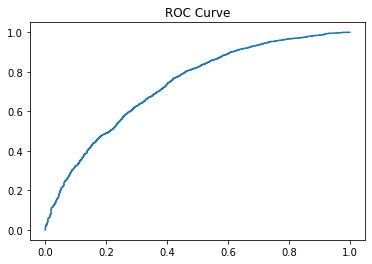

In [67]:
##################################################################################################

import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc

y = np.array(real_label['model_label'])
scores = np.array(pred_label[1])

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()
##################################################################################################


In [79]:
count = 0
pred = []
for i in p:
    if count == len(sample_test_pickle):
        break
    # i是一个字典
    #print(i)
    pred.append(i['probabilities'])
    count += 1

# 疑问：这里预测出了概率，那么threshold是多少？0.5?

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0915/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [80]:
pred_label = pd.DataFrame(pred)
pred_label

,0,1
0,0.222112,0.777888
1,0.578966,0.421034
2,0.132575,0.867425
3,0.969865,0.030135
4,0.824733,0.175267
...,...,...
13581,0.803891,0.196109
13582,0.337654,0.662346
13583,0.221807,0.778193
13584,0.225925,0.774075


In [81]:
real_label = sample_test_pickle[['model_label'] + ['cv_id', 'jd_id']]
real_label

,model_label,cv_id,jd_id
0,0,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153
1,1,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0
2,1,2c9207157dbedf8d017dc7561a247ced,2c9207157dbedfdb017dc10786e9259d
3,0,2c9207157e58b769017e61a3e13c0944,2c9207157e425d5c017e48061bb50e14
4,0,2c9207157e58b769017e9a416cff07d9,2c9207157e425d5c017e47121b3a6eef
...,...,...,...
13581,0,8a69c4b5820f0b2101820f99257c07b7,2c9207158114fb2901811ee8a68f49ea
13582,1,8a69d7a68219933d01823fff37d04ba3,8a69f6f8823a93b901823ffcfae57267
13583,1,8a69d7c282199453018233eef4a43340,2c92071581ebf3390181f5b6628042bd
13584,0,8a69d7c2821994530182395f8b7032c7,8a69f68e82198e91018234ee6739094a


0.8066


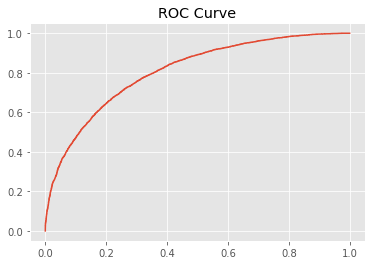

In [84]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc

y = np.array(real_label['model_label'])
scores = np.array(pred_label[1])

fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()


In [85]:
pred_real_label = pd.concat([pred_label[[0,1]], real_label], axis=1)
pred_real_label

,0,1,model_label,cv_id,jd_id
0,0.222112,0.777888,0,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153
1,0.578966,0.421034,1,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0
2,0.132575,0.867425,1,2c9207157dbedf8d017dc7561a247ced,2c9207157dbedfdb017dc10786e9259d
3,0.969865,0.030135,0,2c9207157e58b769017e61a3e13c0944,2c9207157e425d5c017e48061bb50e14
4,0.824733,0.175267,0,2c9207157e58b769017e9a416cff07d9,2c9207157e425d5c017e47121b3a6eef
...,...,...,...,...,...
13581,0.803891,0.196109,0,8a69c4b5820f0b2101820f99257c07b7,2c9207158114fb2901811ee8a68f49ea
13582,0.337654,0.662346,1,8a69d7a68219933d01823fff37d04ba3,8a69f6f8823a93b901823ffcfae57267
13583,0.221807,0.778193,1,8a69d7c282199453018233eef4a43340,2c92071581ebf3390181f5b6628042bd
13584,0.225925,0.774075,0,8a69d7c2821994530182395f8b7032c7,8a69f68e82198e91018234ee6739094a


In [69]:
# 对columns进行重命名
pred_real_label = pred_real_label.rename(columns={'model_label': 'real_label',
                                                0: 'prob_0',
                                                1: 'prob_1'})[['cv_id', 'jd_id', 'real_label', 'prob_0', 'prob_1']]
pred_real_label                             

,cv_id,jd_id,real_label,prob_0,prob_1
0,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,0.631451,0.368549
1,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,0.205021,0.794979
2,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,0.488557,0.511443
3,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0,0.874801,0.125199
4,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0,0.812259,0.187741
...,...,...,...,...,...
5201,8a69d71b829f59ae0182a7129c4b5148,8a69c468826ee9b4018285b0eae10542,0,0.390018,0.609982
5202,8a69d71b82add4e10182aebff7d016d2,8a69c468826ee9b4018290a64a0c01bb,1,0.240187,0.759813
5203,8a69d7b4826d7dfb01826d7efad200f1,2c920715818a462a01818e3f9c0a2337,1,0.044176,0.955824
5204,8a69d7c282199453018247bb00cb68a3,8a69c468826ee9b40182831bedfc5e79,1,0.183274,0.816726


In [70]:
model_label_pred_label = pred_real_label
model_label_pred_label

,cv_id,jd_id,real_label,prob_0,prob_1
0,8a69c41582926ae60182a07b24c1048c,8a69f62f82926a8601829f1379a07648,1,0.631451,0.368549
1,8a69c41582926ae60182a0e09bf27664,8a69d77e82926b410182a083fbf602c0,1,0.205021,0.794979
2,8a69c41582926ae60182a119de713808,8a69f68782590ecb01826326b5e94919,1,0.488557,0.511443
3,8a69c41582a3cc240182b0354c0e7bad,2c92071581ebf3390181ec9e500755e4,0,0.874801,0.125199
4,8a69c4a38284dede0182856ed67c15b2,2c92071580dd3ab70180f18714e119c0,0,0.812259,0.187741
...,...,...,...,...,...
5201,8a69d71b829f59ae0182a7129c4b5148,8a69c468826ee9b4018285b0eae10542,0,0.390018,0.609982
5202,8a69d71b82add4e10182aebff7d016d2,8a69c468826ee9b4018290a64a0c01bb,1,0.240187,0.759813
5203,8a69d7b4826d7dfb01826d7efad200f1,2c920715818a462a01818e3f9c0a2337,1,0.044176,0.955824
5204,8a69d7c282199453018247bb00cb68a3,8a69c468826ee9b40182831bedfc5e79,1,0.183274,0.816726


In [71]:
for k in range(1, 6):

    ndcg_score_list = []
    for jd_id, row_list in model_label_pred_label.groupby('jd_id').groups.items():
        
        # 取出jd_id对应的cv_id信息，可能对应多个
        jd_cv_list_df = model_label_pred_label.iloc[row_list]

        true_relevance = list(jd_cv_list_df['real_label'])
        scores = list(jd_cv_list_df['prob_1'])
        
        # 注意这里的true_relevance和scores的长度若为1，会报错。故都补0，不影响计算。
        true_relevance.append(0)
        scores.append(0)

        # list转array
        true_relevance = np.asarray([true_relevance])
        scores = np.asarray([scores])
        
        # 计算ndcg@k
        ndcg_score = metrics.ndcg_score(true_relevance, scores, k=k)
        ndcg_score_list.append(ndcg_score)

    ndcg_score_list = np.array(ndcg_score_list)
    print('ndcg@{}: {}'.format(k, ndcg_score_list.mean()))

ndcg@1: 0.672254819782062
ndcg@2: 0.6869933642490228
ndcg@3: 0.7002963019745372
ndcg@4: 0.7068830822902802
ndcg@5: 0.7126380637461448


In [39]:
# 生成pred_label
def pred_label_fun(series):
    prob_0 = series[0]
    prob_1 = series[1]
    if prob_1 > prob_0:
        return 1
    else:
        return 0

pred_real_label['pred_label'] = pred_real_label.apply(pred_label_fun, axis=1)
# pred_real_label[['cv_id', 'jd_id', 'model_label', 'pred_label', 0, 1]].to_pickle('../data_20220831/model_label_pred_label.pkl')

pred_real_label[['cv_id', 'jd_id', 'model_label', 'pred_label', 0, 1]]

,cv_id,jd_id,model_label,pred_label,0,1
0,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,0,1,0.222112,0.777888
1,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,1,0,0.578966,0.421034
2,2c9207157dbedf8d017dc7561a247ced,2c9207157dbedfdb017dc10786e9259d,1,1,0.132575,0.867425
3,2c9207157e58b769017e61a3e13c0944,2c9207157e425d5c017e48061bb50e14,0,0,0.969865,0.030135
4,2c9207157e58b769017e9a416cff07d9,2c9207157e425d5c017e47121b3a6eef,0,0,0.824733,0.175267
...,...,...,...,...,...,...
13581,8a69c4b5820f0b2101820f99257c07b7,2c9207158114fb2901811ee8a68f49ea,0,0,0.803891,0.196109
13582,8a69d7a68219933d01823fff37d04ba3,8a69f6f8823a93b901823ffcfae57267,1,1,0.337654,0.662346
13583,8a69d7c282199453018233eef4a43340,2c92071581ebf3390181f5b6628042bd,1,1,0.221807,0.778193
13584,8a69d7c2821994530182395f8b7032c7,8a69f68e82198e91018234ee6739094a,0,1,0.225925,0.774075


In [86]:
# 过滤出label等于0的数据
pred_real_label_0 = pred_real_label[pred_real_label['model_label']==0].reset_index(drop=True)
pred_real_label_0

,0,1,model_label,cv_id,jd_id
0,0.222112,0.777888,0,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153
1,0.969865,0.030135,0,2c9207157e58b769017e61a3e13c0944,2c9207157e425d5c017e48061bb50e14
2,0.824733,0.175267,0,2c9207157e58b769017e9a416cff07d9,2c9207157e425d5c017e47121b3a6eef
3,0.440788,0.559212,0,2c9207157e9b5f31017ed4bb3ad11958,2c9207157e58b774017e9ae2f0a30111
4,0.760617,0.239383,0,2c9207157e9b5f31017ed4bb3ad11958,2c9207157e58b774017e9029d2dd42cc
...,...,...,...,...,...
7982,0.126508,0.873492,0,2c920715816798dd01816a7046b1444e,2c9207158114fb2901815b73db4878dc
7983,0.607412,0.392588,0,2c920715818790420181ad7c4dbf216b,2c9207158114fb29018137247c5335f3
7984,0.454772,0.545228,0,8a69c4b4820f0b2101820fdaa7dc4412,2c92071581900df30181a98a79b457f8
7985,0.803891,0.196109,0,8a69c4b5820f0b2101820f99257c07b7,2c9207158114fb2901811ee8a68f49ea


In [87]:
# 过滤出label等于1的数据
pred_real_label_1 = pred_real_label[pred_real_label['model_label']==1].reset_index(drop=True)
pred_real_label_1

,0,1,model_label,cv_id,jd_id
0,0.578966,0.421034,1,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0
1,0.132575,0.867425,1,2c9207157dbedf8d017dc7561a247ced,2c9207157dbedfdb017dc10786e9259d
2,0.801921,0.198079,1,2c9207157f8e60cd017fb9d2106230a9,2c9207157f347800017f3f790e1f4602
3,0.478854,0.521146,1,2c9207157fd11e47017ffd99fe2e31a2,2c9207157fbc99ce017fc0a495e81ec0
4,0.376251,0.623749,1,2c9207158059e82b018098041916763b,2c920715800e886301804123d0e32a22
...,...,...,...,...,...
5594,0.837828,0.162172,1,8a69c4b4820f0b21018210d3d7054612,2c9207158114fb29018137247c5335f3
5595,0.896895,0.103105,1,8a69c4b5820f0b2101820f0f147903c6,2c92071580709557018098c3804e2bfa
5596,0.337654,0.662346,1,8a69d7a68219933d01823fff37d04ba3,8a69f6f8823a93b901823ffcfae57267
5597,0.221807,0.778193,1,8a69d7c282199453018233eef4a43340,2c92071581ebf3390181f5b6628042bd


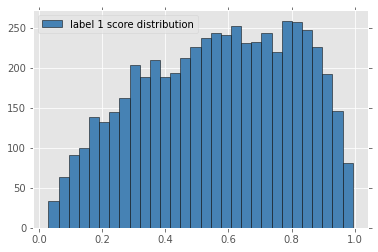

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# label 0的score
data = pred_real_label_1[1]

plt.style.use('ggplot')
plt.hist(data, # 绘图数据
        bins = 30, # 指定直方图的条形数为30个
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = 'label 1 score distribution' )# 为直方图呈现标签

plt.tick_params(top='off', right='off')
plt.legend()
plt.show()

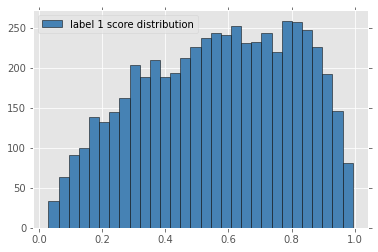

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# label 0的score
data = pred_real_label_1[1]

plt.style.use('ggplot')
plt.hist(data, # 绘图数据
        bins = 30, # 指定直方图的条形数为30个
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = 'label 1 score distribution' )# 为直方图呈现标签

plt.tick_params(top='off', right='off')
plt.legend()
plt.show()

In [45]:
###################################################################################################################################################################################################

In [46]:
###################################################################################################################################################################################################

In [47]:
###################################################################################################################################################################################################

In [108]:
import pandas as pd

rerec_data_pickle = pd.read_pickle('../data_20220831/sample_rerec_data_processed_processed.pkl')
rerec_data_pickle
# 这个rerec_data_pickle是经过过滤的，所以index不连续

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
0,2c92071580f6d9840180ffea3ae70284,2c9207157ef7ed16017efb6696353b11,0,28.0,5,5,1,"[0.213528299923103, 0.278360176354237, 0.10116...",2,1,...,560.0,420.0,"[-0.03490806639846, -0.0948244005230921, -0.04...",1,"[-0.1286863059399647, -0.2703918780581468, -0....",1,"[-0.2265948554965031, 0.2365975687445597, -0.2...",5.0,608.666667,1
1,2c92071580f6d9840180ffea3ae70284,2c9207157ef7ed16017efca7c41522cf,0,28.0,5,5,1,"[0.213528299923103, 0.278360176354237, 0.10116...",2,1,...,420.0,420.0,"[-0.03490806639846, -0.0948244005230921, -0.04...",1,"[-0.1286863059399647, -0.2703918780581468, -0....",1,"[-0.2468591407567025, 0.3630902466565336, -0.3...",5.0,608.666667,1
2,2c920715811ee1b901814751c8d575b4,2c9207157fbc99ce017fcfba4b353e48,0,29.0,6,5,1,"[-0.0458930012129997, -0.0966400839575669, -0....",2,0,...,240.0,650.0,"[0.8020301121767343, 0.4229101266796492, -0.06...",1,"[-0.0635984771163071, 0.1566419781432294, -0.0...",1,"[-0.3690522371769096, 0.4612123417733267, -0.5...",5.0,898.000000,0
3,2c920715811ee1b901814751c8d575b4,2c92071581c8c61e0181cd2af3a41fc1,0,29.0,6,5,1,"[0.1730058508436928, 0.1418203394591635, 0.034...",2,0,...,240.0,650.0,"[0.8020301121767343, 0.4229101266796492, -0.06...",1,"[-0.0579456853457267, -0.0713339990256664, -0....",1,"[-0.2235705077862443, 0.3357177304447382, -0.3...",5.0,898.000000,1
4,2c92071581afaf4b0181b7caff713c2e,2c92071581900df30181951e9e0566b9,0,36.0,6,5,1,"[-0.0278806081579946, -0.1170904123376754, -0....",2,1,...,375.0,450.0,"[-0.0876980561444726, -0.0290344942161584, -0....",1,"[0.0394637124870746, 0.0977519032852919, -0.04...",1,"[0.054213895114271, -0.0531060478281485, -0.03...",12.0,751.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,2c920715811ee1b9018122634ef40a0c,2c9207158114fb29018123914662667b,0,32.0,4,5,0,"[-0.1164895971599631, 0.2985907324720861, 0.01...",0,2,...,360.0,420.0,"[-0.0370250470088169, -0.0866356676886159, -0....",1,"[-0.1012095218088791, -0.0520556537111129, -0....",1,"[-0.334069116493843, 0.1818655978459128, 0.489...",7.0,487.400000,1
2765,2c9207158160d6c3018161bc3acb30a6,2c9207158114fb2901814111cda42dc7,0,31.0,6,5,1,"[0.2585656897511508, 0.2372366511374906, -0.07...",4,2,...,420.0,420.0,"[-0.0425010862013197, -0.0826814066269554, -0....",1,"[-0.0598641958745639, -0.0831534918677584, -0....",1,"[0.0031251855626012, -0.0372985562817497, -0.0...",8.0,852.333333,0
2766,2c9207158059e82b0180776b26675c63,2c920715800e886301802080134114c6,0,33.0,5,5,1,"[0.3037023595523817, 0.0681411549333817, 0.081...",1,0,...,350.0,420.0,"[-0.1184344831268608, 0.0076050251503756, -0.0...",1,"[0.1724390256084213, 0.120637276861982, 0.0191...",1,"[0.0954174343329668, 0.014156893281137, -0.018...",7.0,2527.000000,1
2767,2c920715811ee1b901813bb4a108323e,2c9207158114fb290181411575a132c7,0,31.0,6,5,1,"[0.1328676844535005, 0.035811877537902, 0.0223...",0,2,...,420.0,420.0,"[-0.0368041780176452, -0.0857596688737132, -0....",30,"[-0.0548999540439312, -0.1093718677773959, -0....",1,"[0.0314784058595657, -0.090467903967384, -0.05...",7.0,751.000000,1


In [109]:
rerec_data_pickle = rerec_data_pickle.reset_index(drop=True)

In [110]:
rerec_data_pickle

,cv_id,jd_id,model_label,age,degree_index_cv,degree_index_jd,degree_match_cvjd,description_tfidf_pca,equal_job,gender_index_cv,...,min_annual_salary,parsed_desiredSalary,position_tfidf_pca,recruit_number,requirement_tfidf_pca,school_intersect_cvjd,title_category_tags_tfidf_pca,workYear,work_duration_mean,workyear_match_cvjd
0,2c92071580f6d9840180ffea3ae70284,2c9207157ef7ed16017efb6696353b11,0,28.0,5,5,1,"[0.213528299923103, 0.278360176354237, 0.10116...",2,1,...,560.0,420.0,"[-0.03490806639846, -0.0948244005230921, -0.04...",1,"[-0.1286863059399647, -0.2703918780581468, -0....",1,"[-0.2265948554965031, 0.2365975687445597, -0.2...",5.0,608.666667,1
1,2c92071580f6d9840180ffea3ae70284,2c9207157ef7ed16017efca7c41522cf,0,28.0,5,5,1,"[0.213528299923103, 0.278360176354237, 0.10116...",2,1,...,420.0,420.0,"[-0.03490806639846, -0.0948244005230921, -0.04...",1,"[-0.1286863059399647, -0.2703918780581468, -0....",1,"[-0.2468591407567025, 0.3630902466565336, -0.3...",5.0,608.666667,1
2,2c920715811ee1b901814751c8d575b4,2c9207157fbc99ce017fcfba4b353e48,0,29.0,6,5,1,"[-0.0458930012129997, -0.0966400839575669, -0....",2,0,...,240.0,650.0,"[0.8020301121767343, 0.4229101266796492, -0.06...",1,"[-0.0635984771163071, 0.1566419781432294, -0.0...",1,"[-0.3690522371769096, 0.4612123417733267, -0.5...",5.0,898.000000,0
3,2c920715811ee1b901814751c8d575b4,2c92071581c8c61e0181cd2af3a41fc1,0,29.0,6,5,1,"[0.1730058508436928, 0.1418203394591635, 0.034...",2,0,...,240.0,650.0,"[0.8020301121767343, 0.4229101266796492, -0.06...",1,"[-0.0579456853457267, -0.0713339990256664, -0....",1,"[-0.2235705077862443, 0.3357177304447382, -0.3...",5.0,898.000000,1
4,2c92071581afaf4b0181b7caff713c2e,2c92071581900df30181951e9e0566b9,0,36.0,6,5,1,"[-0.0278806081579946, -0.1170904123376754, -0....",2,1,...,375.0,450.0,"[-0.0876980561444726, -0.0290344942161584, -0....",1,"[0.0394637124870746, 0.0977519032852919, -0.04...",1,"[0.054213895114271, -0.0531060478281485, -0.03...",12.0,751.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,2c920715811ee1b9018122634ef40a0c,2c9207158114fb29018123914662667b,0,32.0,4,5,0,"[-0.1164895971599631, 0.2985907324720861, 0.01...",0,2,...,360.0,420.0,"[-0.0370250470088169, -0.0866356676886159, -0....",1,"[-0.1012095218088791, -0.0520556537111129, -0....",1,"[-0.334069116493843, 0.1818655978459128, 0.489...",7.0,487.400000,1
2723,2c9207158160d6c3018161bc3acb30a6,2c9207158114fb2901814111cda42dc7,0,31.0,6,5,1,"[0.2585656897511508, 0.2372366511374906, -0.07...",4,2,...,420.0,420.0,"[-0.0425010862013197, -0.0826814066269554, -0....",1,"[-0.0598641958745639, -0.0831534918677584, -0....",1,"[0.0031251855626012, -0.0372985562817497, -0.0...",8.0,852.333333,0
2724,2c9207158059e82b0180776b26675c63,2c920715800e886301802080134114c6,0,33.0,5,5,1,"[0.3037023595523817, 0.0681411549333817, 0.081...",1,0,...,350.0,420.0,"[-0.1184344831268608, 0.0076050251503756, -0.0...",1,"[0.1724390256084213, 0.120637276861982, 0.0191...",1,"[0.0954174343329668, 0.014156893281137, -0.018...",7.0,2527.000000,1
2725,2c920715811ee1b901813bb4a108323e,2c9207158114fb290181411575a132c7,0,31.0,6,5,1,"[0.1328676844535005, 0.035811877537902, 0.0223...",0,2,...,420.0,420.0,"[-0.0368041780176452, -0.0857596688737132, -0....",30,"[-0.0548999540439312, -0.1093718677773959, -0....",1,"[0.0314784058595657, -0.090467903967384, -0.05...",7.0,751.000000,1


In [111]:
p = m.predict(input_fn=lambda: input_fn(rerec_data_pickle), checkpoint_path = '../modelV0907/model.ckpt-1000')

In [112]:
count = 0
pred = []
for i in p:
    if count == len(rerec_data_pickle):
        break
    # i是一个字典
    pred.append(i['probabilities'])
    count += 1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ../modelV0907/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [113]:
pred_label = pd.DataFrame(pred)
pred_label

,0,1
0,0.110490,0.889510
1,0.186307,0.813693
2,0.644227,0.355773
3,0.727438,0.272562
4,0.355596,0.644404
...,...,...
2722,0.169411,0.830589
2723,0.585148,0.414852
2724,0.138266,0.861734
2725,0.171602,0.828398


In [114]:
real_label = rerec_data_pickle[['model_label']]
real_label

,model_label
0,0
1,0
2,0
3,0
4,0
...,...
2722,0
2723,0
2724,0
2725,0


In [115]:
pred_real_label = pd.concat([pred_label[[0,1]], real_label], axis=1)
pred_real_label

,0,1,model_label
0,0.110490,0.889510,0
1,0.186307,0.813693,0
2,0.644227,0.355773,0
3,0.727438,0.272562,0
4,0.355596,0.644404,0
...,...,...,...
2722,0.169411,0.830589,0
2723,0.585148,0.414852,0
2724,0.138266,0.861734,0
2725,0.171602,0.828398,0


In [116]:
pred_real_label['model_label'].value_counts()

0    2697
1      30
Name: model_label, dtype: int64

In [117]:
# 过滤出label等于0的数据
pred_real_label_0 = pred_real_label[pred_real_label['model_label']==0].reset_index(drop=True)
pred_real_label_0

,0,1,model_label
0,0.110490,0.889510,0
1,0.186307,0.813693,0
2,0.644227,0.355773,0
3,0.727438,0.272562,0
4,0.355596,0.644404,0
...,...,...,...
2692,0.169411,0.830589,0
2693,0.585148,0.414852,0
2694,0.138266,0.861734,0
2695,0.171602,0.828398,0


In [118]:
# 过滤出label等于1的数据
pred_real_label_1 = pred_real_label[pred_real_label['model_label']==1].reset_index(drop=True)
pred_real_label_1

,0,1,model_label
0,0.864245,0.135755,1
1,0.582286,0.417714,1
2,0.458089,0.541911,1
3,0.801918,0.198082,1
4,0.348937,0.651063,1
5,0.122732,0.877268,1
6,0.281803,0.718197,1
7,0.807998,0.192001,1
8,0.247520,0.752480,1
9,0.899914,0.100086,1


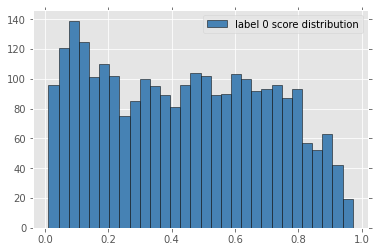

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# label 0的score
data = pred_real_label_0[1]

plt.style.use('ggplot')
plt.hist(data, # 绘图数据
        bins = 30, # 指定直方图的条形数为30个
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = 'label 0 score distribution' )# 为直方图呈现标签

plt.tick_params(top='off', right='off')
plt.legend()
plt.show()


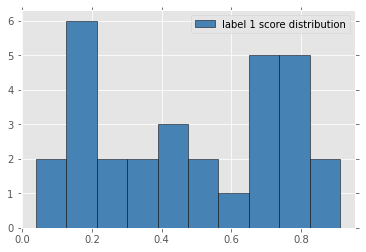

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# label 0的score
data = pred_real_label_1[1]

plt.style.use('ggplot')
plt.hist(data, # 绘图数据
        bins = 10, # 指定直方图的条形数为10个
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = 'label 1 score distribution' )# 为直方图呈现标签

plt.tick_params(top='off', right='off')
plt.legend()
plt.show()


AttributeError: 'Rectangle' object has no property 'normed'

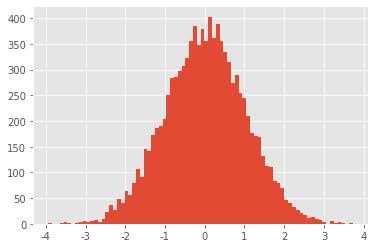

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
plt.hist(data, bins=80, normed=0, facecolor="blue", edgecolor="black", alpha=0)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()